In [ ]:
'''
Title: Linear Regression
Name: Irene Gichana
Date: 01 July 2025

'''

# Load necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('homeprices-m.csv')
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
# Overview of the data
data.info()

# Statistical Summary
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      6 non-null      int64  
 1   bedrooms  5 non-null      float64
 2   age       6 non-null      int64  
 3   price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 324.0 bytes


,area,bedrooms,age,price
count,6.000000,5.00000,6.000000,6.000000
mean,3416.666667,4.20000,16.500000,648333.333333
std,587.934237,1.30384,8.288546,109117.673484
min,2600.000000,3.00000,8.000000,550000.000000
25%,3050.000000,3.00000,9.750000,572500.000000
50%,3400.000000,4.00000,16.500000,602500.000000
75%,3900.000000,5.00000,19.500000,722500.000000
max,4100.000000,6.00000,30.000000,810000.000000


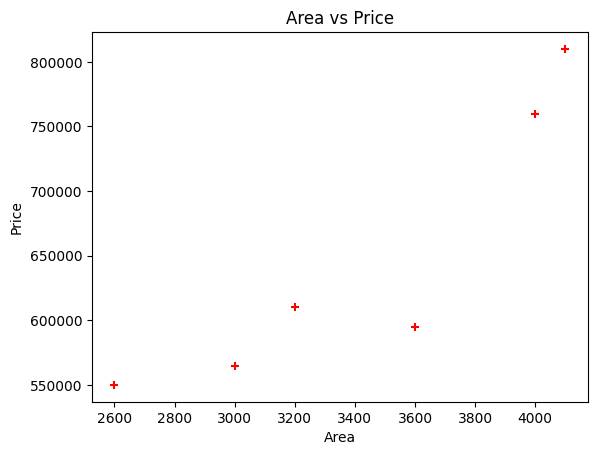

In [ ]:
# Visualize the actual data
# Area vs Price
plt.scatter(data['area'], data['price'], color='red', marker='+')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price')
plt.show()

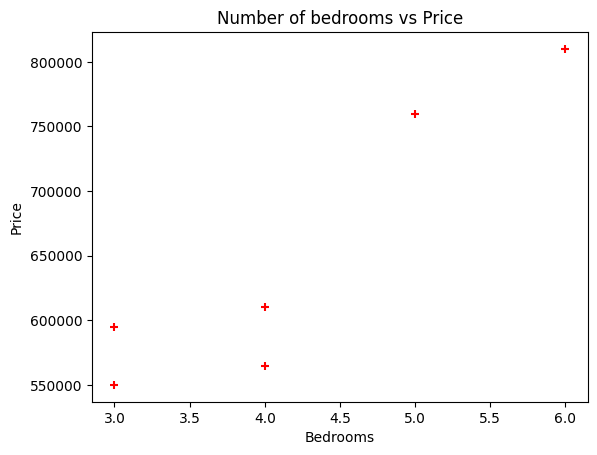

In [ ]:
# Visualize the actual data
# bedrooms vs Price
plt.scatter(data['bedrooms'], data['price'], color='red', marker='+')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Number of bedrooms vs Price')
plt.show()

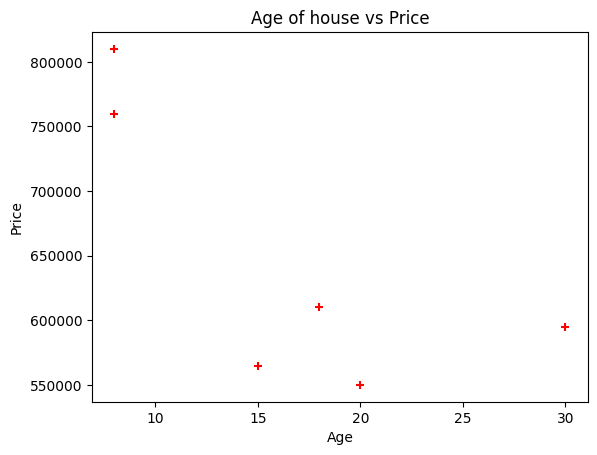

In [ ]:
# Visualize the actual data
# Age vs Price
plt.scatter(data['age'], data['price'], color='red', marker='+')
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Age of house vs Price')
plt.show()

In [ ]:
# Check the missing values
print(data.isnull().sum())

area        0
bedrooms    1
age         0
price       0
dtype: int64


In [ ]:
# Handle the missing value

data['bedrooms'].mean()

np.float64(4.2)

In [ ]:
data['bedrooms'].median()

4.0

In [ ]:
# Impute the missing value using the median
data['bedrooms'] = data['bedrooms'].fillna(data['bedrooms'].median())

In [ ]:
# Split the data

X = data[['area', 'bedrooms', 'age']]
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)

mae = round(mean_absolute_error(y_test, y_pred), 2)
mse = round(mean_squared_error(y_test, y_pred), 2)
rmse = round(np.sqrt(mse), 2)
r2 = round(r2_score(y_test, y_pred), 2)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)


MAE: 39608.21
MSE: 1713617314.55
RMSE: 41395.86
R² Score: -29.46


In [ ]:
# Predict price for a new house
new_house = pd.DataFrame({'area': [3500], 'bedrooms': [4], 'age': [10]})
predicted_price = model.predict(new_house)

print("Predicted price:", round(predicted_price[0], 2))


Predicted price: 659925.37


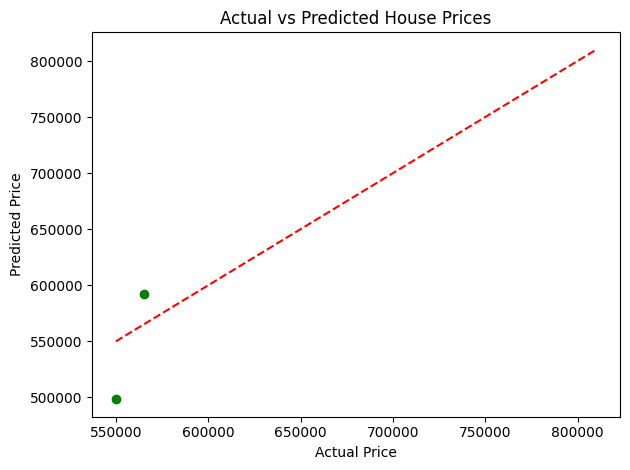

In [ ]:
# Visualize regression line against actual data
plt.scatter(y_test, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.tight_layout()
plt.show()